# SC42150 - Statistical Signal Processing
## Python Assignment I: Stock Market Analysis

#### Team members

- Abina Boesjes (student number):
- Luca de Laat (4135040):

---

## Introduction

The goal of this assignment is to help you get a more practical understanding of some of the concepts of Statistical Signal Processing. Specifically, you will work with stochastic processes and determine their moments, stationarity and ergodicity properties, and also try to detrend the data.

In order to achieve those objectives, you will use the Python programming language, and specifically the modules numpy, scipy (for numerical processing) and matplotlib (for plotting). In case you are completely unfamiliar with Python, you should learn the basics before attempting this exercise. You are allowed to use numpy's implementations of common routines, such as mean or cov amongst other, but if you do so make sure you have read the documentation and are sure that they accomplish exactly what is taught in the lecture notes, as sometimes there are small differences in definitions and implementations. 

Finally, you are also going to use the Jupyter Notebook file format, which might require installing some dependencies on your system. You can find instructions on installing Jupyter [here](https://jupyter.org/install).

## Reporting

The report of this python exercise consists of this Jupyter Notebook file, with your answers added after each question. Answers will consist of code and/or text (markdown) cells. Please use the already indicated cells and format. You will **also** need to deliver a `PDF` version of this file.

In order to create a PDF version of this file, go to the top left, click on `File` then `Export Notebook As` and Choose `PDF`.
If this feature is not supported by your system, you can also choose `LaTeX`.
Then, you can use your preferred `LaTeX` compiler to create the `PDF`. After generation you PDF report, please double check if all answers/plots are correctly displayed.

Moreover, you will also need to send the `.npy` file with the signals used in this exercise. Don't forget to edit your team member's name and student number above. You will submit one Jupyter notebook per team.

## Stock market analysis

Lately you've been fascinated by the world of trading so you decided to learn more about it and see if you can learn any good strategies by examining the trading data and looking for patterns.

You are given a `.npy` file containing historical price data of various stocks. We will make the assumption that all the timeseries are just different realizations of the same stochastic process.

You will need to conduct the following steps to complete your investigation, each of which is worth 1 point:

1. Import the `.npy` file provided using `np.load()` as indicated below. You should now have access to a $N\times K$ array, containing $K$ timeseries of historical price data of various stocks, each of length $N$. Plot the first one and also, in a new figure, plot the first 100 of them together.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm
import itertools as it

with open("data.npy", "rb") as f:
    t = np.load(f)
    S = np.load(f)

print(f"t has size {t.shape}")
print(f"t =\n{t}\n")

print(f"S hase size {S.shape}")
print(f"S =\n{S}")

t has size (100,)
t =
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]

S hase size (100, 10000)
S =
[[1.         1.         1.         ... 1.         1.         1.        ]
 [0.91650571 0.99807028 0.97772982 ... 0.95425816 0.9996188  1.04944731]
 [1.02151521 1.10807792 0.94494465 ... 0.96495276 1.0059257  1.07944192]
 ...
 [1.38640469 4.33953127 2.36383675 ... 5.44151941 1.26135267 2.52742654]
 [1.45187864 4.20481319 2.36533139 ... 5.47849824 1.26483132 2.53404437]
 [1.36963207 4.10436473 2.38333649 ... 5.42398568 1.24618577 2.55307366]]


Text(0, 0.5, 'Price')

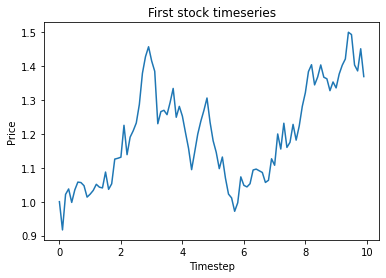

In [3]:
fig1 = plt.plot(t, S[:, 0])
plt.title("First stock timeseries")
plt.xlabel("Timestep")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

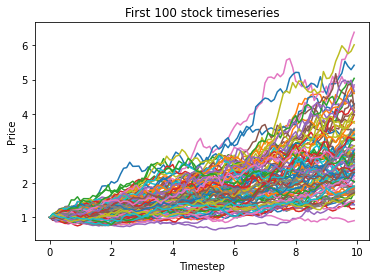

In [4]:
fig2 = plt.plot(t, S[:, :100])
plt.title("First 100 stock timeseries")
plt.xlabel("Timestep")
plt.ylabel("Price")

We will denote the generating stochastic process with $S_{n}\sim f_{S_{n}}$, where $n=t\Delta t$ refers to the time index. Further, we will denote its $k$-th realization with $S_{n}^{k}$.

2. Compute the ensemble mean and variance and plot each one.

Text(0.5, 0, 'Timestep')

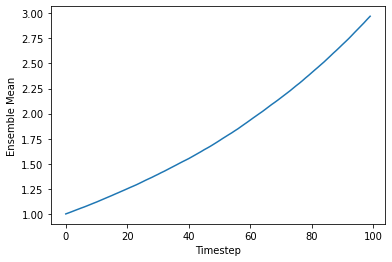

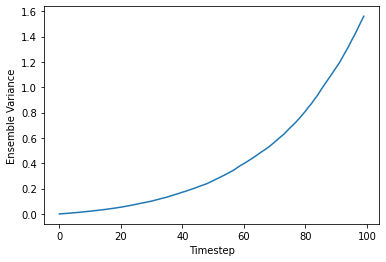

In [5]:
# Compute mean and variance for all stocks at each timestep i.e. row of S
# i.e for all realizations at each timestep
ens_mean = np.mean(S, axis=1)
ens_var = np.var(S, axis=1)

fig3 = plt.figure()
plt.plot(ens_mean)
plt.ylabel("Ensemble Mean")
plt.xlabel("Timestep")

fig4 = plt.figure()
plt.plot(ens_var)
plt.ylabel("Ensemble Variance")
plt.xlabel("Timestep")

3. Compute the correlation matrix $R_{S}$ and visualize it using the `plt.matshow()` command. What can you deduce from that plot?

In [6]:
# Documentation of np.correlate
# It is not the same definition 
# as the one used in  the 
# lectures: See section "Notes"
# of the documentation below
np.correlate??

Signature: np.correlate(a, v, mode='valid')
Source:   
@array_function_dispatch(_correlate_dispatcher)
def correlate(a, v, mode='valid'):
    """
    Cross-correlation of two 1-dimensional sequences.

    This function computes the correlation as generally defined in signal
    processing texts::

        c_{av}[k] = sum_n a[n+k] * conj(v[n])

    with a and v sequences being zero-padded where necessary and conj being
    the conjugate.

    Parameters
    ----------
    a, v : array_like
        Input sequences.
    mode : {'valid', 'same', 'full'}, optional
        Refer to the `convolve` docstring.  Note that the default
        is 'valid', unlike `convolve`, which uses 'full'.
    old_behavior : bool
        `old_behavior` was removed in NumPy 1.10. If you need the old
        behavior, use `multiarray.correlate`.

    Returns
    -------
    out : ndarray
        Discrete cross-correlation of `a` and `v`.

    See Also
    --------
    convolve : Discrete, linear convolution of tw

Text(0.5, 1.0, 'Correlation matrix of S')

<Figure size 432x288 with 0 Axes>

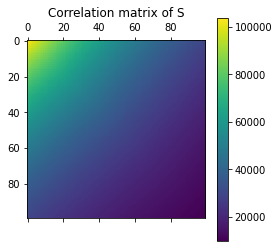

In [7]:
[rS, cS] = S.shape  # rows of S, columns of S

# Initialize R1
R1 = np.ndarray([rS, rS])

# Correlation over timesteps
for ii, time1 in enumerate(S):
    for jj, time2 in enumerate(S):
        # Reversed indexing is required because numpy
        # implementation of correlate is different from
        # the one used in the lectures.
        # Also, it makes more sense since
        # correlation is high at the start, and as time
        # increases, the processes diverge and are less
        # correlated.
        R1[rS - ii - 1, rS - jj - 1] = np.correlate(time1, time2)

figR1 = plt.figure()
im = plt.matshow(R1)
plt.colorbar(im)
plt.title('Correlation matrix of S')

#print(R1)

> The correlation matrix is symmetric. The value of a correlation between $S_i$ and $S_j$ depends only on the lag $i-j$.

4. Can you determine whether the process $S_{n}$ is WSS or not? Explain why.

> Let's check the 3 conditions for WSS:

> 1) The mean is not stationary (see Q2)
> 2) The correlation matrix is symmetric i.e. depends only on the lag (see Q3)
> 3) Its variance is not stationary (see Q2)

> Thus the process is **NOT** WSS.


A friend of yours who has been into trading for some time now, briefly looks at the data and tells you that the stock price changes can be explained by asset model like the following:
$$
    S_{n+1}=S_{n}e^{(\mu-0.5\sigma^{2})\Delta t+\sigma\sqrt{\Delta t}Z_{n}},\quad Z_{n}\sim\mathcal{N}(0,1)
    \label{asset_model} \tag{1}
$$
However, you have no idea what this model represents and what values the parameters $\mu$ and $\sigma$ should take. By inspecting the data you can at least infer that $\Delta t=0.1$ time units, so that's a start.

In your efforts to make sense of ([1](#mjx-eqn-asset_model)), you notice that if you divide $S_{n+1}$ by $S_{n}$ and then take the logarithm you end up with

$$
    \log \left( \frac{S_{n+1}}{S_{n}} \right) = (\mu-0.5\sigma^{2})\Delta t+\sigma\sqrt{\Delta t}Z_{t}
    \label{tf_asset_model} \tag{2}
$$

This looks promising so you decide to try this transformation on the data you have.

5. Apply the transformation $X_{n+1}=\log\left(S_{n+1}/S_{n}\right)$ to your data, compute the ensemble mean and variance and plot them.

deltaT = [0.1]
Shape of X: (99, 10000)
[[-0.08718698 -0.00193158 -0.0225219  ... -0.04682103 -0.00038128
   0.04826366]
 [ 0.108474    0.1045585  -0.03410703 ...  0.0111449   0.00628949
   0.02818051]
 [ 0.01559648 -0.02368133  0.01157721 ... -0.05673352  0.00922771
   0.01403615]
 ...
 [-0.01252937  0.01365699  0.00824244 ...  0.05582974 -0.00549481
   0.00018439]
 [ 0.04614449 -0.03153647  0.00063209 ...  0.00677269  0.00275408
   0.00261498]
 [-0.05831619 -0.02417889  0.00758325 ... -0.01000011 -0.01485126
   0.0074814 ]]
Max absolute value of X = 0.198


Text(0.5, 0, 'Timestep')

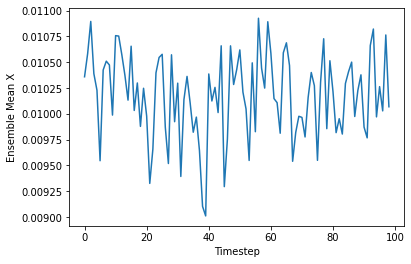

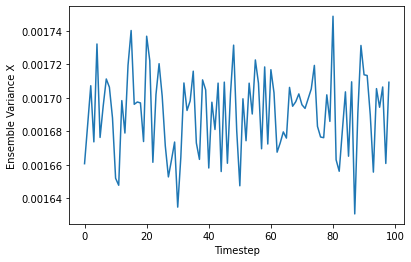

In [35]:
# Check value of Delta t
deltaT = np.unique(np.round(np.diff(t), 14))  # unique if rounded to the 14th decimal
print(f"deltaT = {deltaT}")

# Initialize X
X = np.ndarray([rS - 1, cS])
print(f"Shape of X: {X.shape}")


# Compute transformation
for ii in range(rS - 1):
    ratio = S[ii + 1, :] / S[ii, :]
    X[ii, :] = np.log(ratio)
print(X)

print(f"Max absolute value of X = {np.max(np.abs(X)):.3f}")

# Compute mean and variance at each timestep i.e. row of X
X_ens_mean = np.mean(X, axis=1)
X_ens_var = np.var(X, axis=1)

fig_Xmean = plt.figure()
plt.plot(X_ens_mean)
plt.ylabel("Ensemble Mean X")
plt.xlabel("Timestep")

fig_Xvar = plt.figure()
plt.plot(X_ens_var)
plt.ylabel("Ensemble Variance X")
plt.xlabel("Timestep")

6. Compute the correlation matrix $R_{X}$ and visualize it as before. Do you notice anything different?

Text(0.5, 1.0, 'Correlation matrix of X')

<Figure size 432x288 with 0 Axes>

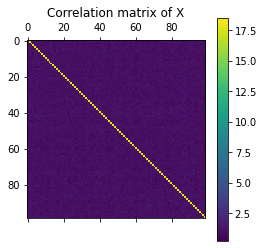

In [9]:
[rX, cX] = X.shape  # rows of X, columns of X

# Initialize RX
RX = np.ndarray([rX, rX])


# Correlation over timesteps
for ii, time1 in enumerate(X):
    for jj, time2 in enumerate(X):
        # Reversed indexing seems required because numpy
        # implementation of correlate is different from
        # the one used in the lectures.
        # Also, it makes more sense to me:
        # correlation is high at the start, and as time
        # increases, the processes diverge and are less
        # correlated.
        RX[rX - ii - 1, rX - jj - 1] = np.correlate(time1, time2)

figRX = plt.figure()
im = plt.matshow(RX)
plt.colorbar(im)
plt.title('Correlation matrix of X')

#print(RX)

> The transform successfully decorrelated our data. Indeed, only the entries on the diagonal have large magnitude. All off diagonal values have much lower magnitude. This indicates that each time step is mostly correlated with itself, and almost not correlated with other time steps. 

7. Can you determine whether the process $X_{n}$ is WSS? If so, what are its first moments, i.e. mean and variance?

> Let's again check the 3 conditions for WSS:

> 1) The mean is close to stationary (see Q5)
> 2) The correlation matrix is symmetric i.e. depends only on the lag (see Q6)
> 3) Its variance is almost stationary and thus finite (see Q5)

> So it's mean and autocorrelation function are time invariant and the process $X_n$ can be considered WSS

In [10]:
# Compute mean and variance at each timestep i.e. row of X
X_mean = np.mean(np.mean(X, axis=1))
X_var = np.var(np.var(X, axis=1))

print(f"X has mean \t{X_mean}")
print(f"X has variance \t{X_var}")

X has mean 	0.010176848926115123
X has variance 	5.77799897129725e-10


8. Compute and plot the time average for a single realization of $X_{n}$, e.g. for $k=1$. Would you be able to say that $X_{n}$ is ergodic in the mean?

Text(0, 0.5, 'Time average')

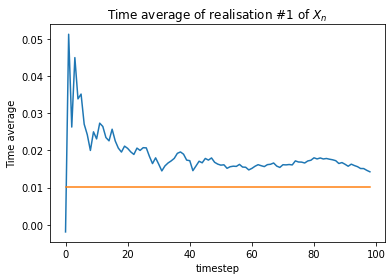

In [49]:
# index of realization
k = 1
# initialize array
time_ave = np.zeros((99, 1))
# initialize cumulative sum
cumsum = 0

for ii, xx in enumerate(X[:,k]):
    cumsum += X[ii, k]
    time_ave[ii] = cumsum / (ii+1)
    
plt.plot(time_ave, label='Time average'))
plt.plot(X_mean*np.ones_like(time_ave), l)
plt.title(f"Time average of realisation #{k} of $X_n$")
plt.xlabel("timestep")
plt.ylabel("Time average")

> Enter answer here.

According to ([2](#mjx-eqn-tf_asset_model)), $X_{t}$ should be Gaussian White Noise since $Z_{t}$ is a Gaussian ZMWN. However, since you are only given data, it's good that you verify this. Remember that a stochastic process is Gaussian if the joint distribution of any combination of elements of $X_n$ is Gaussian. For now we will just take two random time instances to verify this, but feel free to try other combinations as well.

9. Take two time instances of $X_{n}$, e.g. for $n=\{30,70\}$, and plot their 2d histogram across $K$ realizations $\{X_{n}^{k}\}_{k=1}^{K}$ by using $\sqrt{K}$ bins. Can you adequately fit a multivariate normal distribution on this histogram?

In [ ]:
instances = [10, 30, 70, 90]

# Create combinations of selected realizations
combin = it.combinations_with_replacement(instances, 2)

plt.figure(figsize=(10, 10))
Nbins = round(np.sqrt(rX))
jj = 1
for ii, [idx1, idx2] in enumerate(combin):
    if not (idx1 == idx2):  # check if not same realization
        plt.subplot(3, 3, jj)
        plt.hist2d(X[idx1, :], X[idx2, :], Nbins)
        plt.title(f"Realizations {idx1} & {idx2}")
        plt.tight_layout(h_pad=2)
        jj += 1

> Yes it seems we can adequately fit a multivariate normal distribution on these histograms

10. Now verify that the marginals of the above distribution are also Gaussians, that is take the (1d) histograms of the above time instances (with $\sqrt{K}$ bins), plot them, and also fit the correspoding PDFs on top.

In [ ]:
instances = range(0, 90, 10)

Xk = []

for inst in instances:
    selectedInstances = X[inst, :]
    Xk.append(selectedInstances)

plt.figure(figsize=(10, 10))

h = 3
v = np.ceil(len(instances) / h)
Nbins = round(np.sqrt(rX))


for ii, XX in enumerate(Xk):
    plt.subplot(int(v), int(h), ii + 1)
    # Plot histogram
    N = plt.hist(XX, Nbins, density=True)
    #N = plt.hist(XX, Nbins)
    # Compute mean and variance
    mu_X = np.mean(XX)
    sigma_X = np.sqrt(np.var(XX))
    # Find limits from plot
    xmin, xmax = plt.xlim()
    # Determine range for plotting
    x_range = np.linspace(xmin, xmax, 1000)
    # Compute normal distribution from mean and variance
    norm_dist = norm.pdf(x_range, mu_X, sigma_X)
    # Compute scaling factor for fitting to histogram:
    # scaling = (max bin height)/(max norm dist height)
    scaling_factor = np.max(N[0]) / np.max(norm_dist)
    # plot scaled normal distribution
    plt.plot(x_range, scaling_factor * norm_dist,\
            color='red', linewidth=3,\
            label=f"μ:{mu_X:1.3f}, σ:{sigma_X:1.3f}")
    # Set title and layout
    plt.title(f"Realization #{instances[ii]}")
    plt.tight_layout(h_pad=2)
print(np.max(N[0]))


From ([1](#mjx-eqn-asset_model)), it follows that the first two statistical moments can be computed analytically:
\begin{align}
    \mathbb{E}\left[S_{n}\right] &= S_{0}e^{\mu n\Delta t} \label{asset_mean} \tag{3}\\
    \text{Var}\left[S_{n}\right] &= S_{0}^{2}e^{2\mu n\Delta t}\left(e^{\sigma^{2}n\Delta t}-1\right) \label{asset_var} \tag{4}
\end{align}
Having computed the ensemble mean and variance of $X_{n}$ you should be able to determine estimates for the values of $\mu$ and $\sigma$.

11. Using the results from Question 7, compute estimates for $\mu$ and $\sigma$. Use those estimates to calculate the moments ([3](#mjx-eqn-asset_mean))-([4](#mjx-eqn-asset_var)) and plot those along with the ensemble moments of $S_{n}$ of Question 2.

In [ ]:
# Trying to formulate it as optimization problem
# probably wrong

from scipy import optimize

def ES_analytic(t, mu, S0):
    return S0*np.exp(mu*t)

def VarS_analytic(t, sigma, mu, S0):
    return S0**2 * np.exp(2*mu*t)*(np.exp(sigma**2*t)-1)

[mu_opt, S0_opt], pcov = optimize.curve_fit(ES_analytic, t, ens_mean)



12. Having done all the above, you should now be in a position where you can discuss whether the model your friend suggested was good enough to describe the data.

> Enter answer here.